<h2 style = 'color:purple'> Delhi House Price Prediction Model </h2>

In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib

<h3 style='color:purple'>Perform Data Cleaning</h3>

In [209]:
# Load the csv file 
house_data = pd.read_csv("delhi_house_data.csv")

In [210]:
# Print the dataframe
house_data

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [211]:
# Get the dataframe information
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [212]:
# Check null values in the dataframe
house_data.isna().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [213]:
# Find the duplicate rows
house_data.duplicated().sum()

np.int64(83)

In [214]:
# Get the percentage of null values in each column
data_null = house_data.isna().mean() * 100
data_null.to_frame(name = 'percent NULL data (%)')

,percent NULL data (%)
Area,0.000000
BHK,0.000000
Bathroom,0.158856
Furnishing,0.397141
Locality,0.000000
Parking,2.621128
Price,0.000000
Status,0.000000
Transaction,0.000000
Type,0.397141


<Axes: >

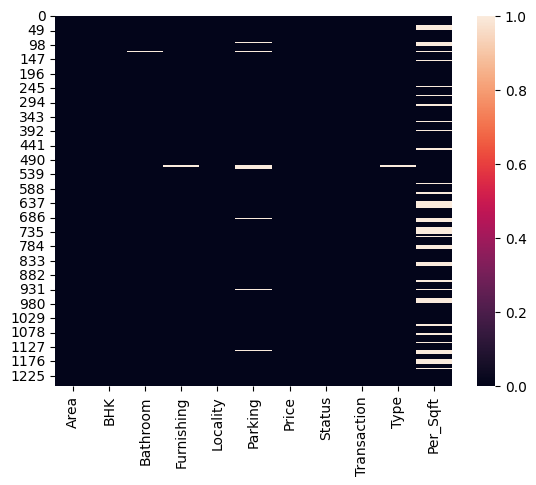

In [215]:
# Visualize the null values in the dataframe
sns.heatmap(house_data.isnull())

In [216]:
# Drop the Per_Sqft Column
house_data.drop("Per_Sqft", axis = 1, inplace = True)

In [217]:
# Get the shape of the dataframe
house_data.shape

(1259, 10)

In [218]:
# Drop rows with any null values
house_data.dropna(inplace = True)

In [219]:
# Find the duplicate values
house_data.duplicated().sum()

np.int64(103)

In [220]:
# Drop the duplicated values
house_data.drop_duplicates(inplace = True)

In [221]:
# Print the dataframe
house_data

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor
...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor


In [222]:
# Get the percentage of null values in each column
data_null = house_data.isna().mean() * 100
data_null.to_frame(name = 'percent NULL data (%)')

,percent NULL data (%)
Area,0.0
BHK,0.0
Bathroom,0.0
Furnishing,0.0
Locality,0.0
Parking,0.0
Price,0.0
Status,0.0
Transaction,0.0
Type,0.0


<Axes: >

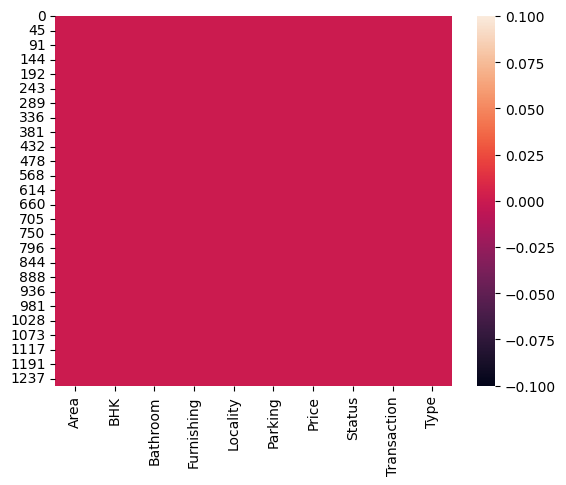

In [223]:
# Visualize the null values in the dataframe
sns.heatmap(house_data.isnull())

<h3 style='color:purple'>Perform EDA</h3>

In [224]:
# Convert the parking, bathroom into numeric values
house_data[['Parking','Bathroom']]=house_data[['Parking','Bathroom']].astype('int64')
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1122 entries, 0 to 1258
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1122 non-null   float64
 1   BHK          1122 non-null   int64  
 2   Bathroom     1122 non-null   int64  
 3   Furnishing   1122 non-null   object 
 4   Locality     1122 non-null   object 
 5   Parking      1122 non-null   int64  
 6   Price        1122 non-null   int64  
 7   Status       1122 non-null   object 
 8   Transaction  1122 non-null   object 
 9   Type         1122 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 96.4+ KB


In [225]:
# print the first few rows of the dataframe
house_data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type
0,800.0,3,2,Semi-Furnished,Rohini Sector 25,1,6500000,Ready_to_move,New_Property,Builder_Floor
1,750.0,2,2,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1,5000000,Ready_to_move,New_Property,Apartment
2,950.0,2,2,Furnished,"Citizen Apartment, Rohini Sector 13",1,15500000,Ready_to_move,Resale,Apartment
3,600.0,2,2,Semi-Furnished,Rohini Sector 24,1,4200000,Ready_to_move,Resale,Builder_Floor
4,650.0,2,2,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1,6200000,Ready_to_move,New_Property,Builder_Floor


In [226]:
# Get the descriptive statistics of the dataframe
round(house_data.describe(), 2)

,Area,BHK,Bathroom,Parking,Price
count,1122.00,1122.00,1122.00,1122.00,1.122000e+03
mean,1448.37,2.79,2.56,2.00,2.101744e+07
std,1503.08,0.96,1.05,6.56,2.475097e+07
min,28.00,1.00,1.00,1.00,1.000000e+06
25%,800.00,2.00,2.00,1.00,5.612500e+06
50%,1152.50,3.00,2.00,1.00,1.400000e+07
75%,1700.00,3.00,3.00,2.00,2.580000e+07
max,24300.00,10.00,7.00,114.00,2.400000e+08


In [227]:
# Calculate the price per square meter
house_data['Price(persqft)'] = round(house_data['Price'] / house_data['Area'],1)

In [228]:
# Print the first few rows of the dataframe
house_data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Price(persqft)
0,800.0,3,2,Semi-Furnished,Rohini Sector 25,1,6500000,Ready_to_move,New_Property,Builder_Floor,8125.0
1,750.0,2,2,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1,5000000,Ready_to_move,New_Property,Apartment,6666.7
2,950.0,2,2,Furnished,"Citizen Apartment, Rohini Sector 13",1,15500000,Ready_to_move,Resale,Apartment,16315.8
3,600.0,2,2,Semi-Furnished,Rohini Sector 24,1,4200000,Ready_to_move,Resale,Builder_Floor,7000.0
4,650.0,2,2,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1,6200000,Ready_to_move,New_Property,Builder_Floor,9538.5


In [229]:
# Get the unique values in each column
house_data.nunique()

Area              312
BHK                 8
Bathroom            7
Furnishing          3
Locality          353
Parking             9
Price             279
Status              2
Transaction         2
Type                2
Price(persqft)    782
dtype: int64

In [230]:
# Get the unique values in the Furnishing column
house_data.Furnishing.value_counts()

Furnishing
Semi-Furnished    640
Unfurnished       314
Furnished         168
Name: count, dtype: int64

In [231]:
# Get the unique values in the Status column
house_data.Status.value_counts()

Status
Ready_to_move    1066
Almost_ready       56
Name: count, dtype: int64

In [232]:
# Get the unique values in the Transaction column
house_data.Transaction.value_counts()

Transaction
Resale          707
New_Property    415
Name: count, dtype: int64

In [233]:
# Get the unique values in the Type column
house_data.Type.value_counts()

Type
Builder_Floor    617
Apartment        505
Name: count, dtype: int64

In [234]:
# Get the most common locality
house_data.Locality.value_counts()[0]

np.int64(29)

In [235]:
# Get the unique values in the Bathroom column
house_data.Bathroom.value_counts()

Bathroom
2    488
3    313
1    134
4    124
5     55
6      5
7      3
Name: count, dtype: int64

In [236]:
# Get the unique values in the BHK column
house_data.BHK.value_counts()

BHK
3     480
2     327
4     197
1      90
5      20
6       6
7       1
10      1
Name: count, dtype: int64

In [237]:
# Get the unique values in the Parking column
house_data.Parking.value_counts()

Parking
1      718
2      317
3       54
4       14
5        7
39       7
114      3
9        1
10       1
Name: count, dtype: int64

In [238]:
# Group by Furnishing and Bathroom, and calculate the mean price
house_data.groupby(['Furnishing', 'Bathroom']).agg({
    'Price' : 'mean'
})

Price
Furnishing     Bathroom              
Furnished      1         4.547500e+06
               2         1.243570e+07
               3         2.164318e+07
               4         3.700000e+07
               5         4.200000e+07
               6         2.890000e+07
               7         1.600000e+08
Semi-Furnished 1         3.477273e+06
               2         9.635956e+06
               3         2.379312e+07
               4         4.852561e+07
               5         7.608421e+07
               6         8.433333e+07
               7         1.600000e+08
Unfurnished    1         2.828644e+06
               2         9.788000e+06
               3         2.182000e+07
               4         5.593300e+07
               5         7.453077e+07
               6         1.700000e+08
               7         7.370000e+07

In [239]:
# Print the first few rows of the dataframe
house_data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Price(persqft)
0,800.0,3,2,Semi-Furnished,Rohini Sector 25,1,6500000,Ready_to_move,New_Property,Builder_Floor,8125.0
1,750.0,2,2,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1,5000000,Ready_to_move,New_Property,Apartment,6666.7
2,950.0,2,2,Furnished,"Citizen Apartment, Rohini Sector 13",1,15500000,Ready_to_move,Resale,Apartment,16315.8
3,600.0,2,2,Semi-Furnished,Rohini Sector 24,1,4200000,Ready_to_move,Resale,Builder_Floor,7000.0
4,650.0,2,2,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1,6200000,Ready_to_move,New_Property,Builder_Floor,9538.5


In [240]:
# Display the shape of the dataframe
house_data.shape

(1122, 11)

In [241]:
f"{round(1122 / 1259 * 100, 1)}%"

'89.1%'

In [242]:
house_data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Price(persqft)
0,800.0,3,2,Semi-Furnished,Rohini Sector 25,1,6500000,Ready_to_move,New_Property,Builder_Floor,8125.0
1,750.0,2,2,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1,5000000,Ready_to_move,New_Property,Apartment,6666.7
2,950.0,2,2,Furnished,"Citizen Apartment, Rohini Sector 13",1,15500000,Ready_to_move,Resale,Apartment,16315.8
3,600.0,2,2,Semi-Furnished,Rohini Sector 24,1,4200000,Ready_to_move,Resale,Builder_Floor,7000.0
4,650.0,2,2,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1,6200000,Ready_to_move,New_Property,Builder_Floor,9538.5


In [243]:
# Drop the unncessary columns in the dataframe  
house_data = house_data.drop(columns=['Transaction'], axis=1)

In [244]:
# Replace the values in some columns in proper way
house_data['Status'] = house_data['Status'].str.replace('_', ' ').str.title()
house_data['Furnishing'] = house_data['Furnishing'].str.replace('-',' ').str.title()
house_data['Type'] = house_data['Type'].str.replace('_', ' ').str.title()
house_data['Bathroom'] = house_data['Bathroom'].astype('Int64')
house_data['Parking'] = house_data['Parking'].astype('Int64')
house_data['Area'] = house_data['Area'].round().astype('Int64')

In [245]:
house_data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Type,Price(persqft)
0,800,3,2,Semi Furnished,Rohini Sector 25,1,6500000,Ready To Move,Builder Floor,8125.0
1,750,2,2,Semi Furnished,"J R Designers Floors, Rohini Sector 24",1,5000000,Ready To Move,Apartment,6666.7
2,950,2,2,Furnished,"Citizen Apartment, Rohini Sector 13",1,15500000,Ready To Move,Apartment,16315.8
3,600,2,2,Semi Furnished,Rohini Sector 24,1,4200000,Ready To Move,Builder Floor,7000.0
4,650,2,2,Semi Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1,6200000,Ready To Move,Builder Floor,9538.5


In [246]:
# Examime the locality column in dataframe
location_stats = house_data['Locality'].apply(lambda x: x.strip()).value_counts(ascending=False)
location_stats

Locality
Lajpat Nagar 3                                        29
Kailash Colony, Greater Kailash                       28
Yamuna Vihar, Shahdara                                28
J R Designers Floors, Rohini Sector 24                28
Lajpat Nagar 2                                        27
                                                      ..
DLF Capitals Phase III, Shivaji Park, Punjabi Bagh     1
Punjabi Bagh Enclave, Punjabi Bagh                     1
Punjabi Bagh Enclave, Madipur, Punjabi Bagh            1
Mandakini Enclave Project, Kalkaji                     1
Pal Mohan Apartments, Punjabi Bagh                     1
Name: count, Length: 353, dtype: int64

In [247]:
# Length of the locality 
location_stats.values.sum()

np.int64(1122)

In [248]:
# Find the locality who is greather than 10 
len(location_stats[location_stats>10]) 

25

In [249]:
len(location_stats[location_stats<=10])

328

In [250]:
# Get the values in locality who is less than 10 
locality_10 = location_stats[location_stats<=10].index

In [251]:
# Rename the less than 10 locality into Others
house_data['Locality'] = house_data['Locality'].apply(lambda x: x if x not in locality_10 else "Others") 

In [252]:
house_data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Type,Price(persqft)
0,800,3,2,Semi Furnished,Others,1,6500000,Ready To Move,Builder Floor,8125.0
1,750,2,2,Semi Furnished,"J R Designers Floors, Rohini Sector 24",1,5000000,Ready To Move,Apartment,6666.7
2,950,2,2,Furnished,Others,1,15500000,Ready To Move,Apartment,16315.8
3,600,2,2,Semi Furnished,Others,1,4200000,Ready To Move,Builder Floor,7000.0
4,650,2,2,Semi Furnished,Others,1,6200000,Ready To Move,Builder Floor,9538.5


In [253]:
# Examine the greather than 10 locality 
location_stats2 = house_data['Locality'].apply(lambda x: x[-20:])
location_stats2.unique()

array(['Others', 'rs, Rohini Sector 24', 'Lajpat Nagar 3',
       'Lajpat Nagar 2', 'maryllis, Karol Bagh', 'New Friends Colony',
       'ony, Greater Kailash', 'muna Vihar, Shahdara', 'Laxmi Nagar',
       'Patel Nagar West', 'Sukhdev Vihar, Okhla', 'Saket',
       'Safdarjung Enclave', 'h Games Village 2010',
       ' Vihar, Mathura Road', 'Chhattarpur', 'Mehrauli',
       'havir Enclave Part 1', 'Malviya Nagar', 'lony, Dilshad Garden',
       'Vasundhara Enclave', 'i Nagar, Kirti Nagar',
       'Sheikh Sarai Phase 1', 'Hauz Khas', 'Chittaranjan Park'],
      dtype=object)

In [254]:
# Replace some locality values in the correct locality value
location_stats2 = location_stats2.replace({
    'rs, Rohini Sector 24':'Rohini',
    'maryllis, Karol Bagh':'Karol Bagh',
    'ony, Greater Kailash': 'Greater Kailash',
    'muna Vihar, Shahdara':'Shahdara',
    'Sukhdev Vihar, Okhla':'Okhla',
    'Apartment, Alaknanda':'Alaknanda',
    ' Vihar, Mathura Road' :'Mathura Road',
    'anglapuri, Sultanpur':'Sultanpur',
    'havir Enclave Part 1':'Mahavir Enclave',
    'lony, Dilshad Garden':'Dilshad Garden',
    'i Nagar, Kirti Nagar':'Kirti Nagar',
    'h Games Village 2010': 'Games Village 2010',
    'havir Enclave Part 1': 'Mahavir Enclave',
    'Rohini Sector 24': 'Rohini',
    'Lajpat Nagar 2': 'Lajpat Nagar',
    'Lajpat Nagar 3': 'Lajpat Nagar',
    'Sheikh Sarai Phase 1': 'Sheikh Sarai'
})


In [255]:
print(location_stats2.unique())
print(len(location_stats2.unique()))

['Others' 'Rohini' 'Lajpat Nagar' 'Karol Bagh' 'New Friends Colony'
 'Greater Kailash' 'Shahdara' 'Laxmi Nagar' 'Patel Nagar West' 'Okhla'
 'Saket' 'Safdarjung Enclave' 'Games Village 2010' 'Mathura Road'
 'Chhattarpur' 'Mehrauli' 'Mahavir Enclave' 'Malviya Nagar'
 'Dilshad Garden' 'Vasundhara Enclave' 'Kirti Nagar' 'Sheikh Sarai'
 'Hauz Khas' 'Chittaranjan Park']
24


In [256]:
# Replace the locality values in the correct dataframe which is the house_data
valid_locations = location_stats2.tolist()
def extract_location(locality):
    for loc in valid_locations:
        if loc != 'Others' and loc in str(locality):
            return loc
    return 'Others'


house_data['Locality'] = house_data['Locality'].apply(lambda x: extract_location(x))

In [257]:
# Print the house dataframe 
house_data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Type,Price(persqft)
0,800,3,2,Semi Furnished,Others,1,6500000,Ready To Move,Builder Floor,8125.0
1,750,2,2,Semi Furnished,Rohini,1,5000000,Ready To Move,Apartment,6666.7
2,950,2,2,Furnished,Others,1,15500000,Ready To Move,Apartment,16315.8
3,600,2,2,Semi Furnished,Others,1,4200000,Ready To Move,Builder Floor,7000.0
4,650,2,2,Semi Furnished,Others,1,6200000,Ready To Move,Builder Floor,9538.5


In [258]:
house_data.shape

(1122, 10)

In [259]:
house_data = house_data[house_data.Parking <= 5]

In [260]:
house_data.shape   

(1110, 10)

In [261]:
house_data.head(2)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Type,Price(persqft)
0,800,3,2,Semi Furnished,Others,1,6500000,Ready To Move,Builder Floor,8125.0
1,750,2,2,Semi Furnished,Rohini,1,5000000,Ready To Move,Apartment,6666.7


<h3 style='color:purple'>Outlier Removal Using Standard Deviation and Mean</h3>

**Here we find that min price per sqft is 204 rs/sqft whereas max is 538461, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation**

In [262]:
'''
# Boxplot to get the find the outliers in per_sqft area
def outliers_boxplot_locality(df):
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x='Locality', y='Price(persqft)', width=0.8)
    plt.xticks(rotation=90)
    plt.title("Boxplot of Per Sqft Prices by Locality (All Data)")
    plt.xlabel("")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()
'''

'\n# Boxplot to get the find the outliers in per_sqft area\ndef outliers_boxplot_locality(df):\n    plt.figure(figsize=(10, 5))\n    sns.boxplot(data=df, x=\'Locality\', y=\'Price(persqft)\', width=0.8)\n    plt.xticks(rotation=90)\n    plt.title("Boxplot of Per Sqft Prices by Locality (All Data)")\n    plt.xlabel("")\n    plt.ylabel("")\n    plt.tight_layout()\n    plt.show()\n'

In [263]:
# call the function for locality outliers
#outliers_boxplot_locality(house_data)

In [264]:
# Calculate the shape of the dataframe
house_data.shape

(1110, 10)

In [265]:
# Remove Outliers in 3 Ways: Z-Score, Quantile (IQR), and Percentile Method from 'Per_Sqft' column in house_data
'''
def percentile_outliers(df, column='Price(persqft)', lower=0.025, upper=0.975, min_group_size=10):
    df_clean = pd.DataFrame()
    for key, subdf in df.groupby('Locality'):
        if len(subdf) < min_group_size:
            df_clean = pd.concat([df_clean, subdf], ignore_index=True)
            continue
        subdf = subdf.copy()
        lb = subdf[column].quantile(lower)
        ub = subdf[column].quantile(upper)
        subdf = subdf[(subdf[column] >= lb) & (subdf[column] <= ub)]
        df_clean = pd.concat([df_clean, subdf], ignore_index=True)
    return df_clean
'''
'''
from scipy.stats import median_abs_deviation
def mad_outlier_removal(df, column='Price(persqft)', threshold=3.5, min_group_size=10):
    df_clean = pd.DataFrame()
    for key, subdf in df.groupby('Locality'):
        if len(subdf) < min_group_size:
            df_clean = pd.concat([df_clean, subdf], ignore_index=True)
            continue
        median_val = subdf[column].median()
        mad_val = median_abs_deviation(subdf[column], scale='normal')
        subdf['mad_score'] = abs(subdf[column] - median_val) / mad_val
        subdf = subdf[subdf['mad_score'] < threshold]
        df_clean = pd.concat([df_clean, subdf.drop(columns='mad_score')], ignore_index=True)
    return df_clean

'''

'''
def remove_outliers_advanced(df, column='Price(persqft)', method='iqr', iqr_factor=1.5, lower_pct=0.01, upper_pct=0.99, min_group_size=10):
    df_clean = pd.DataFrame()
    
    for key, subdf in df.groupby('Locality'):
        if len(subdf) < min_group_size:
            df_clean = pd.concat([df_clean, subdf], ignore_index=True)
            continue

        subdf = subdf.copy()

        if method == 'iqr':
            Q1 = subdf[column].quantile(0.25)
            Q3 = subdf[column].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - iqr_factor * IQR
            upper = Q3 + iqr_factor * IQR

        elif method == 'percentile':
            lower = subdf[column].quantile(lower_pct)
            upper = subdf[column].quantile(upper_pct)

        elif method == 'both':
            Q1 = subdf[column].quantile(0.25)
            Q3 = subdf[column].quantile(0.75)
            IQR = Q3 - Q1
            iqr_lower = Q1 - iqr_factor * IQR
            iqr_upper = Q3 + iqr_factor * IQR
            pct_lower = subdf[column].quantile(lower_pct)
            pct_upper = subdf[column].quantile(upper_pct)
            lower = max(iqr_lower, pct_lower)
            upper = min(iqr_upper, pct_upper)

        else:
            raise ValueError("Method must be 'iqr', 'percentile', or 'both'")

        subdf = subdf[(subdf[column] >= lower) & (subdf[column] <= upper)]
        df_clean = pd.concat([df_clean, subdf], ignore_index=True)
    
    return df_clean
'''


'\ndef remove_outliers_advanced(df, column=\'Price(persqft)\', method=\'iqr\', iqr_factor=1.5, lower_pct=0.01, upper_pct=0.99, min_group_size=10):\n    df_clean = pd.DataFrame()\n\n    for key, subdf in df.groupby(\'Locality\'):\n        if len(subdf) < min_group_size:\n            df_clean = pd.concat([df_clean, subdf], ignore_index=True)\n            continue\n\n        subdf = subdf.copy()\n\n        if method == \'iqr\':\n            Q1 = subdf[column].quantile(0.25)\n            Q3 = subdf[column].quantile(0.75)\n            IQR = Q3 - Q1\n            lower = Q1 - iqr_factor * IQR\n            upper = Q3 + iqr_factor * IQR\n\n        elif method == \'percentile\':\n            lower = subdf[column].quantile(lower_pct)\n            upper = subdf[column].quantile(upper_pct)\n\n        elif method == \'both\':\n            Q1 = subdf[column].quantile(0.25)\n            Q3 = subdf[column].quantile(0.75)\n            IQR = Q3 - Q1\n            iqr_lower = Q1 - iqr_factor * IQR\n       

In [266]:
#remove_outliers_advanced(house_data).head()

In [267]:
#print("Original:", house_data.shape)
#print("Percentile:", remove_outliers_advanced(house_data).shape)


In [268]:
# Remove those outlier rows from the main dataframe
#df2 = mad_outlier_removal(house_data)
#df2

# Apply the final refined filter
#df2 = remove_outliers_advanced(house_data, method='both', iqr_factor=1.3, lower_pct=0.02, upper_pct=0.98)
#df2


In [269]:
#df2.shape

In [270]:
'''
def plot_boxplot(df2, title):
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df2, x='Locality', y='Price(persqft)')
    plt.xticks(rotation=90)
    plt.title(title, fontsize=14)
    plt.ylim(0, 100000)  
    plt.tight_layout()
    plt.show()
'''

"\ndef plot_boxplot(df2, title):\n    plt.figure(figsize=(10, 5))\n    sns.boxplot(data=df2, x='Locality', y='Price(persqft)')\n    plt.xticks(rotation=90)\n    plt.title(title, fontsize=14)\n    plt.ylim(0, 100000)  \n    plt.tight_layout()\n    plt.show()\n"

In [271]:

# plot_boxplot(df2, "After Removing Outliers (IQR)")


In [272]:
# Get the bhk and bathroom outliers
def plot_scatter_chart(df, location):
    bhk2 = df[(df['Locality'] == location) & (df['BHK'] == 2)]
    bhk3 = df[(df['Locality'] == location) & (df['BHK'] == 3)]
    matplotlib.rcParams['figure.figsize'] = (8, 4)
    plt.scatter(bhk2['Price(persqft)'], bhk2['Price'], color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3['Price(persqft)'], bhk3['Price'], color='green', marker='+', label='3 BHK', s=50)
    plt.xlabel("Price (per sqft)")
    plt.ylabel("Total Price (in Lakhs)")
    plt.title(f"BHK Price Comparison in {location}")
    plt.legend()
    plt.grid(True)
    plt.show()

In [273]:
# Remove BHK Outliers
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Locality'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['Price(persqft)']),
                'std': np.std(bhk_df['Price(persqft)']),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(
                    exclude_indices,
                    bhk_df[bhk_df['Price(persqft)'] < stats['mean']].index.values
                )
    return df.drop(exclude_indices, axis='index')

df3 = remove_bhk_outliers(house_data)
df3.shape


(756, 10)

In [274]:
df3.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Type,Price(persqft)
1,750,2,2,Semi Furnished,Rohini,1,5000000,Ready To Move,Apartment,6666.7
2,950,2,2,Furnished,Others,1,15500000,Ready To Move,Apartment,16315.8
4,650,2,2,Semi Furnished,Others,1,6200000,Ready To Move,Builder Floor,9538.5
12,630,2,2,Semi Furnished,Others,1,5500000,Ready To Move,Builder Floor,8730.2
14,344,2,2,Semi Furnished,Others,1,3310000,Ready To Move,Builder Floor,9609.7


In [275]:
df3.shape

(756, 10)

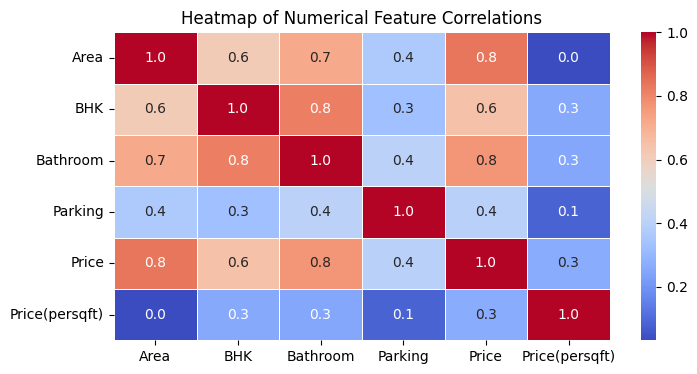

In [276]:
# Plot heatmap of numerical feature correlations
plt.figure(figsize=(8, 4))
sns.heatmap(df3.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5)
plt.title("Heatmap of Numerical Feature Correlations")
plt.show()

In [277]:
# Save the cleaned dataframe after removing outliers
df3.to_csv("dhp_cleaned.csv", index=False)

In [278]:
# Drop the 'Per_Sqft' column from df2
df3 = df3.drop(['Price(persqft)'], axis=1)

<h3 style='color:purple'>Cross Validation & Train Test Data Splitting For Model Selection</h3>

In [279]:
# Print the first few rows of the cleaned dataframe
df3.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Type
1,750,2,2,Semi Furnished,Rohini,1,5000000,Ready To Move,Apartment
2,950,2,2,Furnished,Others,1,15500000,Ready To Move,Apartment
4,650,2,2,Semi Furnished,Others,1,6200000,Ready To Move,Builder Floor
12,630,2,2,Semi Furnished,Others,1,5500000,Ready To Move,Builder Floor
14,344,2,2,Semi Furnished,Others,1,3310000,Ready To Move,Builder Floor


In [280]:
df3.shape

(756, 9)

In [281]:
# Get the x and y values from the dataframe
x = df3[['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Type', 'Status']]
y = df3['Price']
x.shape,y.shape

((756, 8), (756,))

In [282]:
# Import train_test_split library
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((604, 8), (152, 8), (604,), (152,))

<h3 style='color:purple'>One Hot Encoding</h3>

In [283]:
# import Preprocessing libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler


# Define feature columns
onehot_cols = ['Locality', 'Furnishing']
ordinal_cols = ['Status', 'Type']
numeric_cols = ['Area', 'BHK', 'Bathroom', 'Parking']

# Combine all
all_features = onehot_cols + ordinal_cols + numeric_cols

# Drop the target if needed
X_train = X_train[all_features]
X_test = X_test[all_features]

# Define transformer
ct = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), onehot_cols),
        ('ordinal', OrdinalEncoder(), ordinal_cols),
        ('scaler', StandardScaler(), numeric_cols)
    ]
)

X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)

print(X_train_transformed.shape, X_test_transformed.shape)


(604, 31) (152, 31)


In [284]:
# Check the one-hot encoded columns and their total count
onehot = ct.named_transformers_['onehot']
print("OneHotEncoded columns:", onehot.get_feature_names_out())
print("Total one-hot columns:", len(onehot.get_feature_names_out()))

print("Total transformed columns:", X_train_transformed.shape[1])


OneHotEncoded columns: ['Locality_Chittaranjan Park' 'Locality_Dilshad Garden'
 'Locality_Games Village 2010' 'Locality_Greater Kailash'
 'Locality_Hauz Khas' 'Locality_Karol Bagh' 'Locality_Kirti Nagar'
 'Locality_Lajpat Nagar' 'Locality_Laxmi Nagar' 'Locality_Mahavir Enclave'
 'Locality_Malviya Nagar' 'Locality_Mathura Road' 'Locality_Mehrauli'
 'Locality_New Friends Colony' 'Locality_Okhla' 'Locality_Others'
 'Locality_Patel Nagar West' 'Locality_Rohini'
 'Locality_Safdarjung Enclave' 'Locality_Saket' 'Locality_Shahdara'
 'Locality_Sheikh Sarai' 'Locality_Vasundhara Enclave'
 'Furnishing_Semi Furnished' 'Furnishing_Unfurnished']
Total one-hot columns: 25
Total transformed columns: 31


<h3 style='color:purple'>Building a model using datasets</h3>

In [285]:
# Import Models libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline


# Define all models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(n_estimators=200, max_depth=4, learning_rate=0.05, random_state=42),
    "CatBoost": CatBoostRegressor(
        iterations=500,
        learning_rate=0.05,
        depth=6,
        verbose=0,
        random_state=42
    )
}
# Create pipelines for each model
pipelines = {
    name: Pipeline(steps=[("preprocessor", ct), ("model", model)])
    for name, model in models.items()
} 

In [286]:
# Import kfold cross-validation library
from sklearn.model_selection import  cross_val_score, KFold


# Define KFold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate each model using R² score in percentage
print("Model Performance (Average R² Score as Percentage):\n")
for name, pipeline in pipelines.items():
    try:
        scores = cross_val_score(pipeline, x, y, cv=cv, scoring='r2')
        avg_score = scores.mean() * 100 
        print(f"{name}: {avg_score:.2f}%")
    except Exception as e:
        print(f"{name}: Error during evaluation - {e}")


Model Performance (Average R² Score as Percentage):

Linear Regression: 77.55%
Ridge: 77.61%
Lasso: 77.55%
ElasticNet: 73.11%
Decision Tree: 67.41%
Random Forest: 80.12%
Gradient Boosting: 80.99%
AdaBoost: 71.69%
SVR: -9.21%
KNN: 78.84%
XGBoost: 81.64%
CatBoost: 84.23%


In [287]:
# Select the best model based on R² score
from sklearn.metrics import r2_score, mean_squared_error

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

best_model_pipeline = pipelines["Random Forest"]
best_model_pipeline.fit(X_train, y_train_log)

y_pred_log = best_model_pipeline.predict(X_test)
y_pred = np.expm1(y_pred_log)

r2 = r2_score(y_test, y_pred) * 100
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Test R2 Score: {:.2f}%".format(r2))
print("Test RMSE: {:.2f}".format(rmse))

Test R2 Score: 82.26%
Test RMSE: 7441736.13


In [288]:
# Turning
from sklearn.model_selection import GridSearchCV
params = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 20],
    'model__min_samples_split': [2, 5]
}
grid = GridSearchCV(pipelines["Random Forest"], params, cv=5, scoring='r2')
grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)


Best params: {'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_estimators': 100}


In [289]:
# Best Model for find 
# Get best model from GridSearchCV
best_model_pipeline = grid.best_estimator_

# Make predictions
y_pred = best_model_pipeline.predict(X_test)

# Evaluate R² and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Show metrics
print(f"Tuned R2 Score: {r2 * 100:.2f}%")
print(f"Tuned RMSE: ₹{rmse:,.2f}")

Tuned R2 Score: 81.36%
Tuned RMSE: ₹7,628,254.92


In [290]:
# Sample new data
new_input = pd.DataFrame([{
    'Area': 500,
    'BHK': 2,
    'Bathroom': 2,                                
    'Furnishing': 'Semi Furnished',
    'Locality': 'Rohini',
    'Parking': 1,
    'Status': 'Ready To Move',
    'Type': 'Builder Floor'
}])

# Predict
predicted_price = best_model_pipeline.predict(new_input)[0]
predicted_price = max(0, predicted_price)

print(f"🏷️ Predicted House Price: ₹{predicted_price:,.2f}")


🏷️ Predicted House Price: ₹3,899,665.30


In [291]:
# Save the model file 
import joblib

joblib.dump(best_model_pipeline, "best_model.pkl")


['best_model.pkl']